## Exploratory Data Analysis on Data Science job salaries

### About the dataset
#### Data Science Job Salaries Dataset contains 11 columns, each are:

work_year: The year the salary was paid.

experience_level: The experience level in the job during the year

employment_type: The type of employment for the role

job_title: The role worked in during the year.

salary: The total gross salary amount paid.

salary_currency: The currency of the salary paid as an ISO 4217 currency code.

salary_in_usd: The salary in USD

employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.

remote_ratio: The overall amount of work done remotely

company_location: The country of the employer's main office or contracting branch

company_size: The median number of people that worked for the company during the year

### 1. Import necessary libraries

In [1]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from turtle import color
%matplotlib inline

### 2. Data preparation and cleaning with Pandas

##### Source of Data Science job salaries from kaggle using link : https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

##### Let's load the CSV file using Pandas library. We'll give the name salary_df to the data frame which indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [2]:
salary_df = pd.read_csv('ds_salaries.csv')
salary_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


##### Now let's see the shape of the dataframe, how many rows and columns the dataset contains.

In [3]:
salary_df.shape

(607, 12)

##### The dataframe salary_df contain 607 records and 12 columns.

Here now we can see that the dataframe contains column Unnamed: 0 which is unnecessary and also the dataframe have 3 salary related column salary, salary_currency, salary_in_usd here we can choose only one column salary_in_usd to manage all job salary in a single currency and remove the both column salary and salary_currency.

So now let's delete these 3 columns :

Unnamed: 0

salary

salary_currency

In [4]:
salary_df.drop(['salary','salary_currency','Unnamed: 0'], axis=1, inplace=True)

In [5]:
salary_df.shape

(607, 9)

##### Here we can see that the columns Unnamed: 0, salary and salary_currency is removed from the dataframe and there only 9 columns are remaining in the dataframe. Now lets check how it looks like.

In [6]:
salary_df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


##### Now let's check each columns data type and also check if the column has null values then how many null values it have by using DataFrame df.info() method.

In [7]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


##### Here it is looks like any column does not contain null value.
Here total 9 columns are in dataframe. Where `work_year`, `salary_in_usd`, `remote_ratio` are of integer type and `experience_level`, `employment_type`, `job_title`, `employee_residence`, `company_location` and `company_size` are of type object(strings).

##### Let's see some statistics about the numeric column of the dataframe.

In [8]:
salary_df.describe()

,work_year,salary_in_usd,remote_ratio
count,607.000000,607.000000,607.00000
mean,2021.405272,112297.869852,70.92257
std,0.692133,70957.259411,40.70913
min,2020.000000,2859.000000,0.00000
25%,2021.000000,62726.000000,50.00000
50%,2022.000000,101570.000000,100.00000
75%,2022.000000,150000.000000,100.00000
max,2022.000000,600000.000000,100.00000


##### Here if we look the statistics of salary_in_usd then we can see that average salary is $112297 and minimum value of salary is $2859 and maximum value of salary is $600000 and the standard deviation is 70957.26

##### Also the data preperation and cleaning process done. Our data is now ready to do analysis and vizualisation.

### 3. Open-ended exploratory analysis and visualization

Now the dataframe is prepared and cleaned. So lets do some analysis on it and visualize the pattern which the dataframe have. 
In the dataframe maximum column are categorical but it also have some numerical column lets analyse each column by some charts using python libraries like `Matplotlib`, `Seaborn` and `plotly`.

#### 3.1. Univariate analysis
In this section, we'll explore each columns in the dataset to see the distributions of features, and to get some useful informations.

Mainly two parts in the section: 
- Analysis on categorical columns
- Analysis on numeric columns

6 categorical columns in the dataframe:
- Experiece Level
- Job Titles
- Employment Type
- Employee Resdience
- Company Location
- Company Size

##### 3.1.1. Experience level
Let's analyze column `experience_level` and see what information we got from this column.

In [9]:
salary_df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

There's 4 categorical values in column 'Experience Level', each are:
- EN - Entry-level / Junior
- MI - Mid-level / Intermediate
- SE - Senior-level / Expert
- EX - Executive-level / Director

so let's convert these shortcuts into their respective values.

In [10]:
salary_df['experience_level'] = salary_df['experience_level'].replace({
    "EN" : "Entry-level/Junior",
    "MI" : "Mid-level/Intermediate",
    "SE" : "Senior-level/Expert",
    "EX" : "Executive-level/Director"
})

salary_df['experience_level'].unique()

array(['Mid-level/Intermediate', 'Senior-level/Expert',
       'Entry-level/Junior', 'Executive-level/Director'], dtype=object)

In [11]:
exp_level = salary_df.experience_level.value_counts()
exp_level

Senior-level/Expert         280
Mid-level/Intermediate      213
Entry-level/Junior           88
Executive-level/Director     26
Name: experience_level, dtype: int64

Here we can see that there are **280** employees are **Senior-level/Expert**, **213** employees are **Mid-level/Intermediate**, **88** employees are **Entry-level/Junior** and **26** employees are **Executive-level/Director**.

Now let's calculate the percentage of employees in each categories of experience level and create a experience dataframe.

In [12]:
percents = list(np.round((100*exp_level.values / sum(exp_level.values)).tolist(), 2))

exp_df = pd.DataFrame({
    'exp' : list(exp_level.index),
    'counts' : list(exp_level.values),
    'percent' : percents
})

exp_df

,exp,counts,percent
0,Senior-level/Expert,280,46.13
1,Mid-level/Intermediate,213,35.09
2,Entry-level/Junior,88,14.50
3,Executive-level/Director,26,4.28


##### Now let's visualize it by a Bar Chart so that we can understand this distribution clearly.

In [13]:
fig = px.bar(
    data_frame = exp_df,
    x='exp',
    y='counts',
    color='exp',
    color_discrete_sequence = px.colors.qualitative.G10,
    template='plotly_dark',
    title = 'Experience level distribution',
    text=exp_df['percent'].apply(lambda x: '{0:1.2f}%'.format(x))
)

fig.update_layout(font_size=16,
                  xaxis_title = 'Experience level',
                  yaxis_title = 'Number of Jobs')

fig.show()

##### Here we can clearly see that most of the employee comes in **Senior-level/Expert** and **Mid-level/Intermediate** categories and very few employees are comes inside the **Executive-level/Director** categories which is quite obvious.

##### 3.1.2. Job title
Let's analyse the `job_title` column.

In [14]:
jobtitle = salary_df['job_title'].value_counts()[:10]
jobtitle

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: job_title, dtype: int64

Here the **Data Scientist** job title has maximum position which is 143.

##### Let's see this by a Bar Chart.

In [15]:
fig = px.bar(
    x=jobtitle,
    y=jobtitle.index,
    color=jobtitle,
    template='plotly_dark',
    title='Top 10 job title',
    text_auto=True
)

fig.update_layout(font_size=16,
                  yaxis_title = 'Job Title',
                  xaxis_title = 'Number of jobs')
fig.show()

Here we can see there **Data Scientist(143)** job title has maximum position and then **Data Engineer(132)** and then **Data Analyst(97)** and **Machine Learning Engineer(41)**  and so on. The above only top 10 jobs titles are mentioned.

##### Let's also visualize this by WordCloud.

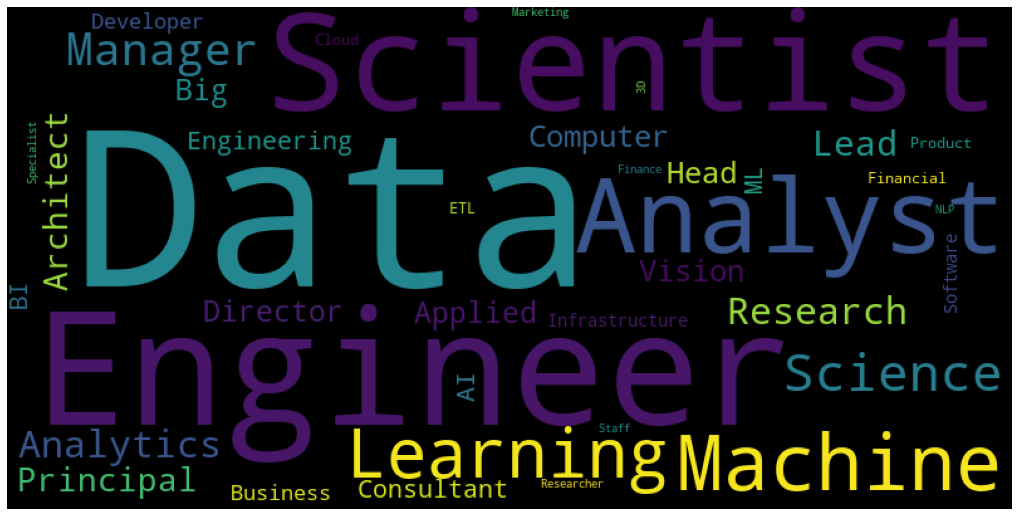

In [16]:
words = ' '.join((jobtitle for jobtitle in salary_df.job_title))

wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400).generate(words)

plt.figure(figsize=(18, 10))
plt.axis('off')
plt.grid(False)
plt.imshow(wc);

In above word cloud we can easily see that **Data Scientist**, **Data Engineer**, **Data Analyst**, **Machine Learning Engineer** job title having most position.

##### 3.1.3. Employment type
Now let's analyse `employment_type` column.

In [17]:
salary_df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

There's 4 categorical values in column `employment_type`, each are:

- FT - Full time
- CT - Part time
- PT - Contract
- FL - Freelance

so let's convert these shortcuts into their respective values.

In [18]:
salary_df['employment_type'] = salary_df['employment_type'].replace({
    "FT" : "Full time",
    "CT" : "Part time",
    "PT" : "Contract",
    "FL" : "Freelance"
})

salary_df['employment_type'].unique()

array(['Full time', 'Part time', 'Contract', 'Freelance'], dtype=object)

In [19]:
emp_type = salary_df.employment_type.value_counts()
emp_type

Full time    588
Contract      10
Part time      5
Freelance      4
Name: employment_type, dtype: int64

Here we can see that most of employment are of **Full time** type and **Freelance** type employment are very less.

##### Let's visualize it by a Bar Chart.

In [20]:
fig = px.bar(x=emp_type.index,
       y=emp_type,
       title='Jobs Based on employment type',
       color=emp_type,
       template='plotly_dark',
       width=1000, height=600,
       text_auto = True)

fig.update_layout(yaxis_title='Number of Jobs', 
                  xaxis_title='Employment type',
                  font_size=16)
fig.show()

##### 3.1.4. Company size
Let's analyze `company_size` column.

In [21]:
salary_df['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

There's 3 categorical values in column employment_type, each are:

- L - Large
- M - Medium
- S - Small

so let's convert these shortcuts into their respective values.

In [22]:
salary_df['company_size'] = salary_df['company_size'].replace(
    {
        'L' : 'Large',
        'M' : 'Medium',
        'S' : 'Small'
    })

comp_size = salary_df['company_size'].value_counts()
comp_size

Medium    326
Large     198
Small      83
Name: company_size, dtype: int64

Now here we can see that there are most of the companies are comes in **Medium** category which is **326**. **198** companies are of type **Large** and only **83** companies are in **Small** category.

##### Let's see this by a Pie Chart.

In [23]:
fig = px.pie(names=comp_size.index,
             values=comp_size,
             title= 'Company size',
             template='plotly_dark')

fig.update_traces(textinfo='percent+value',
                  textfont_size=16,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color='white'

fig.show()

##### In above pie chart we can see that there are **`53%`** companies are **Medium** categories, **`32%`** companies are **Large** size and only **`13%`** campanies are **small** type.

##### 3.1.5. Employee residence
Let's analyze `employee_residence` column and calculate top 20 employee residence.

In [24]:
emp_res = salary_df.employee_residence.value_counts()[:20]
emp_res

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
Name: employee_residence, dtype: int64

Here we can see that there are most of the employee who are from the **United State (332 employees)**. 

##### Now let's visualize it by a Bar chart.

In [25]:
fig = px.bar(y=emp_res.index,
       x=emp_res,
       title='Top 20 employee residence',
       color=emp_res.index,
       template='plotly_dark',
       width=1000, height=600,
       text_auto = True)

fig.update_layout(yaxis_title='Employee Residence', 
                  xaxis_title='Number of employee',
                  font_size=16)
fig.show()

##### 3.1.6. Company Location
Let's analyze `company_location` column

In [26]:
comp_loc = salary_df.company_location.value_counts()[:20]
comp_loc

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
Name: company_location, dtype: int64

Here we can see that there are most of the companies are in the United State (355 companies). 

##### Now let's visualize it by a Bar chart.

In [27]:
fig = px.bar(y=comp_loc.index,
       x=comp_loc,
       title='Top 20 Company location',
       color=comp_loc,
       template='plotly_dark',
       width=1000, height=600,
       text_auto = True)

fig.update_layout(yaxis_title='Company Location', 
                  xaxis_title='Number of company',
                  font_size=16)
fig.show()

##### We'll explore 3 numeric columns in this section, each are:

- **work_year** : The year the salary was paid
- **salary_in_usd** : The salary in USD
- **remote_ratio** : The overall amount of work done remotely,

##### 3.1.7.  Work year
Now let's analyze `work_year` column

In [28]:
wrk_year = salary_df['work_year'].value_counts()
wrk_year

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

Now here we can see that here the job increase by year, in **2020** there are only **72 Data Science jobs** but it increase by **300%** and become **217** and in **2022** it becomes **318**. Now let's see what percentage of jobs are in each year.

##### Let's visualize it by pie chart.

In [29]:
fig = px.pie(names=wrk_year.index,
             values=wrk_year.values,
             title= 'Work year distribution',
             template='plotly_dark')

fig.update_traces(textinfo='percent+value',
                  textfont_size=18,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color='white'

fig.show()

##### 3.1.8. Salary in USD
Now let's analyze `salary_in_usd` column.

In [30]:
fig = px.histogram(data_frame=salary_df,
             x='salary_in_usd',
             nbins=100,
             marginal='box',
             template='plotly_dark',
             barmode='group')

fig.update_layout(title='Data Science Job Salary distribution',
                  yaxis_title='Number of employee', 
                  xaxis_title='Salary (in USD)',
                  font_size=16)

##### Here we can see that salary of most employees are in between **20K - 200K**. Also it seems there are some employees which have salary in between **300K - 600K** which is quite acceptable.

##### 3.1.9. Remote ratio
Let's analyze `remote_ratio` column

In [31]:
salary_df.remote_ratio.unique()

array([  0,  50, 100], dtype=int64)

There's 3 categorical values in column `remote_ratio`, each are:

- 0 - No Remote Work
- 50 - Partially Remote Work
- 100 - Fully Remote Work

so let's convert these shortcuts into their respective values.

In [32]:
salary_df['remote_ratio'] = salary_df['remote_ratio'].replace(
    {
        0 : 'No Remote Work',
        50 : 'Partially Remote Work',
        100 : 'Fully Remote Work'
    })

remote_jobs = salary_df.remote_ratio.value_counts()
remote_jobs

Fully Remote Work        381
No Remote Work           127
Partially Remote Work     99
Name: remote_ratio, dtype: int64

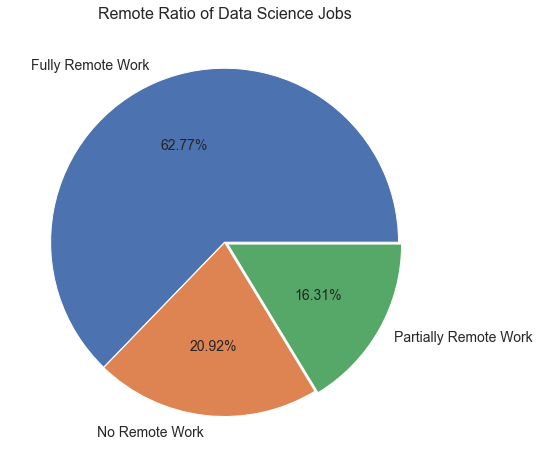

In [54]:
# x = list(remote_jobs.values)

# plt.figure(figsize=(16, 8))

# patches, texts, pcts = plt.pie(
#     x, labels=remote_jobs.index, autopct='%1.2f%%',
#     wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},
#     textprops={'size': 'x-large'},
#     startangle=90)

# # For each wedge, set the corresponding text label color to the wedge's face color.
# for i, patch in enumerate(patches):
#   texts[i].set_color(patch.get_facecolor())
  
# plt.setp(pcts, color='white')
# plt.setp(texts, fontweight=500)
# plt.title("Remote Ratio of Data Science Jobs", fontsize=16, color='white')
# plt.tight_layout()

plt.figure(figsize=(16, 8))
plt.pie(labels=remote_jobs.index,
       x=remote_jobs,
       explode=[0.001, 0.001, 0.02],
       autopct='%1.2f%%',
       textprops={'fontsize': 14});
plt.title("Remote Ratio of Data Science Jobs", fontsize=16)
plt.show()

In above pie chart we can easily see that there are **62%** jobs which are **Fully Remote Work** and **16%** jobs are **Partialy Remote Work** only **20%** jobs are there which have **No Remote Work** may be this happen due to **Covid-19** maximum jobs having **Remote Work**.

#### 3.2. Multivariate Analysis
In this section, we'll do **multivariate analysis** of the dataset to see the distributions of features with respect to other features, and to get some useful informations.

##### 3.2.1. Employee Resdience and company location
Now let's compare `employee_residence` column with `company_location` column to see how many companies and how many employee are in a particular location. 

In [34]:
emp_loc = salary_df['employee_residence'].value_counts()[:10]
emp_loc

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
Name: employee_residence, dtype: int64

In [35]:
company_loc = salary_df['company_location'].value_counts()[:10]
company_loc

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
Name: company_location, dtype: int64

In [36]:
fig = go.Figure(data=[
    go.Bar(name = 'Employee Residence',
            x = emp_loc.index,
            y = emp_loc,
            text = emp_loc),
    
    go.Bar(name = 'Company location',
            x = company_loc.index,
            y = company_loc,
            text=company_loc)
    ])

fig.update_layout(
                  title='Comparison of Employee Residence and Company Location',
                  template='plotly_dark',
                  font_size=16,
                  xaxis_title = 'Country',
                  yaxis_title = 'Count')
                   
fig.show()

Here we can see that there are **332** employee which are from **United States** but there are **355** job positions are in **United State** so it means there are some working employee which are from other country.

Also if we see for **India** then there are only **24** position in india but there are **30** employee means **6** employee are working in other country.

##### 3.2.2. Salary and Work year
Now let's analyze `salary_in_usd` and `work_year` column and see what are the distribution of salary for the employees during each working year.

In [37]:
fig = px.histogram(data_frame=salary_df,
             x='salary_in_usd',
             nbins=80,
             marginal='box',
             color='work_year',
             barmode='group',
             template='plotly_dark',
             title='Distribution of salary during each year')

fig.update_layout(xaxis_title="Salary (in USD)",
                  yaxis_title="Number of employees",
                  font_size=16)

Here in above histogram we can easily see that the salary and the number of jobs both are increasing during each year.

##### Let's visualize it also by a density plot.

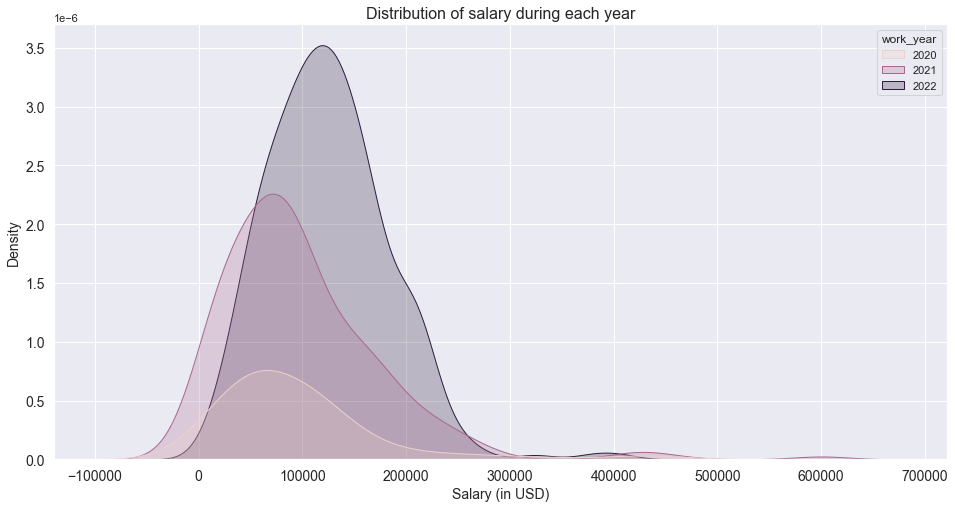

In [38]:
sns.set(rc={'figure.figsize':(16,8)})

sns.kdeplot(data=salary_df, x='salary_in_usd', hue='work_year', fill=True);

plt.title("Distribution of salary during each year", fontsize=16)
plt.xlabel("Salary (in USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

##### 3.2.3. Salary with Experience
Now let's do analysis how the salary changes with experience.

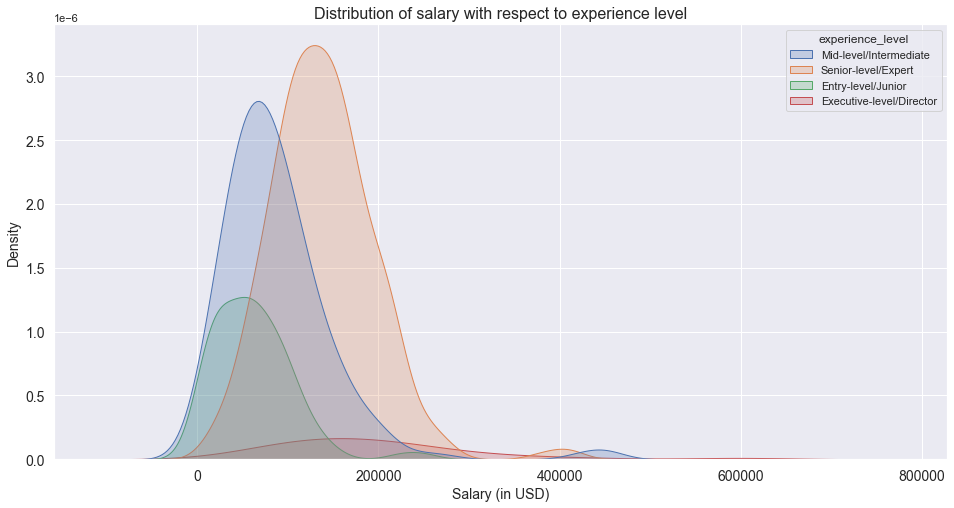

In [39]:
sns.set(rc={'figure.figsize':(16,8)})

sns.kdeplot(data=salary_df, x='salary_in_usd', hue='experience_level', multiple='layer', fill=True)

plt.title("Distribution of salary with respect to experience level", fontsize=16)
plt.xlabel("Salary (in USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

##### 3.2.4. Salary by Company size
Let's analyze the salary on the basis of company size.

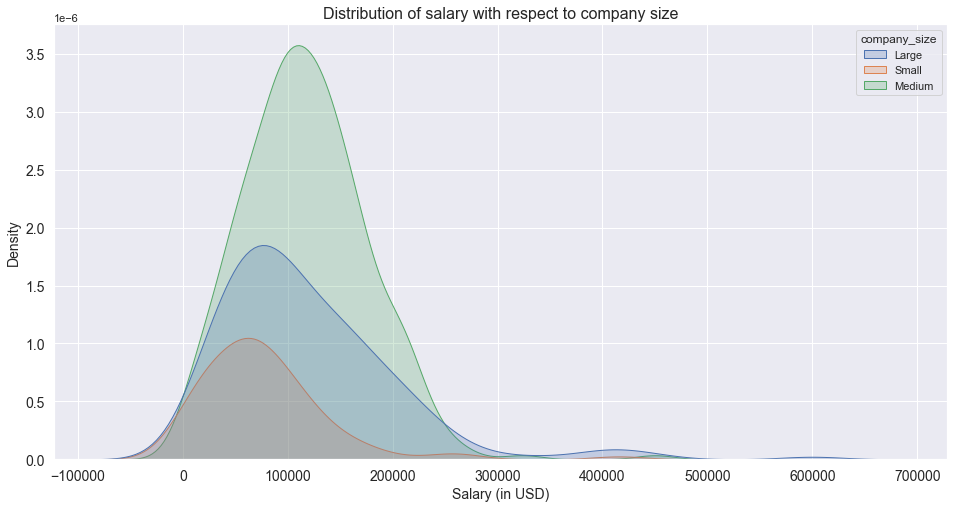

In [40]:
sns.set(rc={'figure.figsize':(16,8)})

sns.kdeplot(data=salary_df, x='salary_in_usd', hue='company_size', multiple='layer', fill=True)

plt.title("Distribution of salary with respect to company size", fontsize=16)
plt.xlabel("Salary (in USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

##### 3.2.5. Remote job with Work year
Now let's analyze how remote ratio changes with work year.

In [41]:
remote_year = salary_df.groupby(['work_year','remote_ratio']).size()

remote_year_2020 = np.round(remote_year[2020].values / remote_year[2020].values.sum(), 2)
remote_year_2021 = np.round(remote_year[2021].values / remote_year[2021].values.sum(), 2)
remote_year_2022 = np.round(remote_year[2022].values / remote_year[2022].values.sum(), 2)

categories = ['No Remote Work', 'Partially Remote Work', 'Fully Remote Work']

In [42]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
             r = remote_year_2020, 
             theta = categories,
             fill = 'toself',
             name = '2020 remote ratio'
             ))
fig.add_trace(go.Scatterpolar(
             r = remote_year_2021, 
             theta = categories,
             fill = 'toself',
             name = '2021 remote ratio'
#              fillcolor = 'lightred'
             ))
fig.add_trace(go.Scatterpolar(
             r = remote_year_2022, 
             theta = categories,
             fill = 'toself',
             name = '2022 remote ratio'
#              fillcolor = 'lightblue'
             ))
fig.update_layout(template='plotly_dark',
                  title='Remote Ratio by work year',
                  font_size=16)

fig.show()

##### Here we can easily see that there are more remote jobs in year **2020-2021** but the number of remote jobs are reduced in **2022** may be it is due to **Covid-19**.

### 4. Asking and answering interesting questions
Now let's ask some interesting questions and try to answer it.

#### Q1. What is the average salary of employees during each year?

In [43]:
mean_salary_year = salary_df.groupby(by='work_year').mean().reset_index()
mean_salary_year

,work_year,salary_in_usd
0,2020,95813.000000
1,2021,99853.792627
2,2022,124522.006289


In [44]:
years = ['2020', '2021', '2022']
fig = px.bar(x=years,
       y=mean_salary_year.salary_in_usd,
       text_auto = True,
       color = years,
      template = 'plotly_dark',
      title='Year wise average salary')

fig.update_layout(xaxis_title='Salary (in USD)',
                  yaxis_title='Years',
                  font_size=16)

fig.show()

##### In above bar chart we can see that the average salary of employees in **2020** is **`$95813`**, in **2021** is **`$99853`** and in **2022** is **`$124522`**.

#### Q2. What is the average salary of employees on the basis of experience level?

In [45]:
exp_salary = salary_df.groupby(by='experience_level').mean()
exp_salary

,work_year,salary_in_usd
experience_level,,
Entry-level/Junior,2021.011364,61643.318182
Executive-level/Director,2021.423077,199392.038462
Mid-level/Intermediate,2021.276995,87996.056338
Senior-level/Expert,2021.625000,138617.292857


In [46]:
fig = px.bar(x=exp_salary.index,
       y=exp_salary.salary_in_usd,
       text_auto = True,
       color = exp_salary.index,
      template = 'plotly_dark',
      title='Year wise average salary')

fig.update_layout(xaxis_title='Experience-level',
                  yaxis_title='Salary',
                  font_size=16)

fig.show()

##### Here we can see average salary of **Entry-level/Junior** is **`$61643`**, **Executive-level/Director** is **`$199392`**, **Mid-level/Intermediate** is **`$87996`** and **Senior-level/Expert** have **`$138617`**.

#### Q3. What is the average salary of employee depending on the company size?

In [47]:
salary_size = salary_df.groupby(by='company_size').mean().reset_index()
salary_size

,company_size,work_year,salary_in_usd
0,Large,2021.065657,119242.994949
1,Medium,2021.751534,116905.466258
2,Small,2020.855422,77632.674699


In [48]:
fig = px.bar(x=salary_size.company_size,
       y=salary_size.salary_in_usd,
       text_auto = True,
       color = salary_size.company_size,
      template = 'plotly_dark',
      title='Company wise average salary')

fig.update_layout(xaxis_title='Company',
                  yaxis_title='Salary (in USD)',
                  font_size=16)

fig.show()

##### Here we can see that **Large** company provide **`$119243`**, **Medium** company provide **`$116905`** and **Small** company provides **`$77632`** average salary to their employees.

#### Q4. What is the percentage of indian employee who are working in USA?

In [49]:
indian_df = salary_df[salary_df['employee_residence']=='IN']
indian_us_employee_df = indian_df[indian_df['company_location']=='US']
percent = indian_us_employee_df.shape[0] / indian_df.shape[0]
percent

0.13333333333333333

##### Here we can see that there are 13% employees who are indian and working in United States.

#### Q5. What are the percentage of indian employee who are working in india as a `Senior-level/Expert` ?

In [50]:
indian_emp_df = salary_df[(salary_df['employee_residence']=='IN') & (salary_df['company_location']=='IN')]
indian_expert = indian_emp_df[indian_emp_df['experience_level']=='Senior-level/Expert']
indian_expert

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
129,2021,Senior-level/Expert,Full time,Lead Data Scientist,40570,IN,Partially Remote Work,IN,Large
197,2021,Senior-level/Expert,Full time,Machine Learning Engineer,24342,IN,Fully Remote Work,IN,Large
263,2021,Senior-level/Expert,Full time,Machine Learning Engineer,66265,IN,No Remote Work,IN,Large
285,2021,Senior-level/Expert,Full time,Data Science Manager,94665,IN,Partially Remote Work,IN,Large


In [51]:
indian_expert_percent = indian_expert.shape[0] / indian_emp_df.shape[0]
indian_expert_percent

0.16666666666666666

So, there is 16% indian employee working in india who are working as a **Senior-level/Expert**.

##### Let's visualize it by a pie chart.

In [52]:
indian_emp_count = indian_emp_df.experience_level.value_counts()
indian_emp_count

Mid-level/Intermediate      10
Entry-level/Junior           9
Senior-level/Expert          4
Executive-level/Director     1
Name: experience_level, dtype: int64

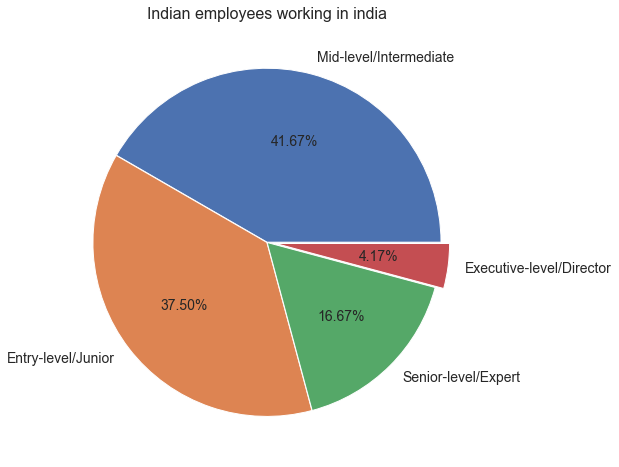

In [53]:
plt.figure(figsize=(16, 8))
plt.pie(labels=indian_emp_count.index,
       x=indian_emp_count,
       explode=[0.001, 0.001, 0.001, 0.05],
       autopct='%1.2f%%',
       textprops={'fontsize': 14});
plt.title("Indian employees working in india", fontsize=16)
plt.show()

##### Here in the chart also we can see that there are 16% indian employees who are working in india as **Senior-level/Expert**.

## 5. Summarizing inferences and drawing conclusions
- In this project we have taken Data science jobs salaries [Dataset](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries) from [kaggle](https://www.kaggle.com).
- We'll give the name `salary_df` to the data frame which indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis. 
- Once we done data preprocessing we start analyze this data and do some exploratory data analysis by using `Numpy` and `Pandas` and visualize the pattern the data have using python libraries like `Matplotlib`, `Seaborn`, `Plotly`.
- We analyze and visualize the data using different `Bar Chart`, `Histogram`, `Pie Chart` etc.
- There are most of jobs which require **Senior-level/Expert** experience level and very few positions are opened for **Executive-level/Director**.
- There are more jobs which have job title as **Data Scientist** and **Data Engineer**.
- There are most of the jobs which is opened for **Full time** employment.
- Most of companies are located in **USA** and also most of employees are from **USA**.
- Number of jobs and the salary are increasing with year and experience-level.
- Most of the employees have their salary in between **`$20000-$200000`**.
- The compenies are providing **Remote Jobs** during **Covid-19**.
- Medium size of compenies are paying high salaries to their employees.